<a href="https://colab.research.google.com/github/md-abdullah-al-mamun-mojumder/Deep-Learning/blob/main/XOR_Preceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Predictions for XOR:
[0 1 1 0]


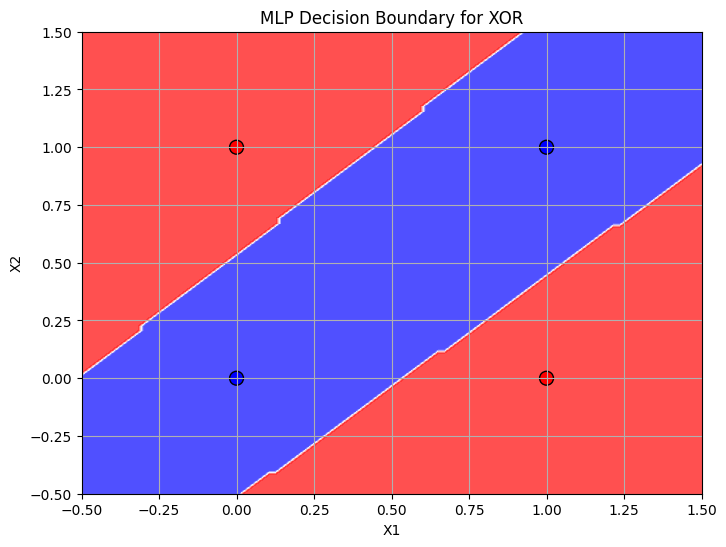

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid Activation Function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Derivative of Sigmoid
def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))

# Multi-Layer Perceptron
def mlp(X, y, epochs=10000, lr=0.1):
    # Initialize weights and biases
    np.random.seed(42)
    input_neurons = X.shape[1]
    hidden_neurons = 2
    output_neurons = 1

    # Random initialization
    W1 = np.random.uniform(-1, 1, (input_neurons, hidden_neurons))  # Weights for input to hidden
    b1 = np.zeros((1, hidden_neurons))                              # Bias for hidden layer
    W2 = np.random.uniform(-1, 1, (hidden_neurons, output_neurons))  # Weights for hidden to output
    b2 = np.zeros((1, output_neurons))                              # Bias for output layer

    # Training loop
    for epoch in range(epochs):
        # Forward pass
        Z1 = np.dot(X, W1) + b1  # Hidden layer linear step
        A1 = sigmoid(Z1)         # Hidden layer activation
        Z2 = np.dot(A1, W2) + b2  # Output layer linear step
        A2 = sigmoid(Z2)         # Output layer activation

        # Backward pass
        error = y - A2
        dA2 = error * sigmoid_derivative(Z2)  # Gradient for output layer
        dW2 = np.dot(A1.T, dA2)
        db2 = np.sum(dA2, axis=0, keepdims=True)

        dA1 = np.dot(dA2, W2.T) * sigmoid_derivative(Z1)  # Gradient for hidden layer
        dW1 = np.dot(X.T, dA1)
        db1 = np.sum(dA1, axis=0, keepdims=True)

        # Update weights and biases
        W2 += lr * dW2
        b2 += lr * db2
        W1 += lr * dW1
        b1 += lr * db1

    return W1, b1, W2, b2

# Prediction Function
def predict(X, W1, b1, W2, b2):
    Z1 = np.dot(X, W1) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)
    return (A2 > 0.5).astype(int)

# XOR Data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Train MLP
W1, b1, W2, b2 = mlp(X, y, epochs=10000, lr=0.1)

# Predictions
predictions = predict(X, W1, b1, W2, b2)
print("Predictions for XOR:")
print(predictions.flatten())

# Plot Decision Boundary
x_min, x_max = -0.5, 1.5
y_min, y_max = -0.5, 1.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = predict(grid, W1, b1, W2, b2)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap='bwr')
plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), cmap='bwr', edgecolors='k', s=100)
plt.title("MLP Decision Boundary for XOR")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid()
plt.show()
